In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Sensor:
    """
    one line following sensor, for the purpose of this implementation we are using 
    basic sensor that will return the square of distance from this sensor to the line
    """
    def __self__(self,model=None
                 ,add_noise=0.05 #add 5% noise to the simulated measurments
                ):
        
        self.model=model
        self.noise=add_noise
        
    def value(self,dist):
        if model:
            return self.model*(1+(1-np.random.random())*2*self.noise)
        else:
            return dist**2*(1+(1-np.random.random())*2*self.noise)
        
    def fit(self):
        """
        for fitting, for this I would need data arrrrgh
        """
        pass
    

In [68]:
class Sensor_Array:
    def __init__(self,sensors,start_X,start_Y,length,start_orientation=0):
        """
        start_X, start_Y is the loc of the center of the array
        start_orientation, the inital starting orientation
        """
        
        self.X=start_X
        self.Y=start_Y
        self.orientation=np.radians(start_orientation)
        print(self.orientation)
        self.sensors=sensors
        self.length=length
        self.calculateSensorLocs()
        
        
    def calculateSensorLocs(self):
        print(np.cos(self.orientation))
        self.sensorLocs=np.array([self.X+np.linspace(-self.length/2,self.length/2,len(self.sensors))*np.sin(self.orientation),
                                self.Y-np.linspace(-self.length/2,self.length/2,len(self.sensors))*np.cos(self.orientation)]).T
        
    def get_values(self,line_loc):
        distances=np.linalg.norm(self.sensorLocs-line_loc,axis=1)
        
        sensor_values=np.empty(len(self.sensors))
        
        for i,d in enumerate(distances):
            sensors_values[i]=self.sensors[i].value(d)
        return sensor_values
    
    def update_loc(self,newX,newY,new_orientation):
        self.X=newX
        self.Y=newY
        self.orientation=np.radians(new_orientation)
        self.calculateSensorLocs()
        
    def plot(self,ax,line_color="black",sensor_colors="blue"):
        for i,sensor_loc in enumerate(self.sensorLocs):
            #print(sensor_loc)
            ax.plot(sensor_loc[0],sensor_loc[1],"o",
                    label=f"sensor{i}",color=sensor_colors)
        ax.plot(self.sensorLocs[:,0],self.sensorLocs[:,1],color=line_color)
        

In [69]:
class Car:
    def __init__(self,startX,startY,startOrientation,sensor_array,
                motor_dist=10, #distance from the center of the car to the motor, this is a random value rn
                mPerToSpeed=1, #motor percentage to speed, this is a random value rn
                sensor_array_offest=10 #the offest from the motor centerline to the sensor array in cm, this is a random value rn
                ):
        
        self.X=startX
        self.Y=startY ## the X,Y coords of the center of the motor centerline
        self.orientation=np.radians(startOrientation)
        self.sensor_array=sensor_array
        self.sensor_array_offest=sensor_array_offest
        self.mPerToSpeed=mPerToSpee
        
    def calculate_sensorLoc(self):
        sensorX=self.X+np.cos(self.orientation)*self.sensor_array_offest
        sensorY=self.Y+np.sin(self.orientation)*self.sensor_array_offest
        self.sensor_array.update_loc(sensorX,sensorY,self.orientation)
        
        
    def move_car(self,leftMotorPercent, 
                 rightMotorPercent,
                 time_step=0.005 #5ms
                ):
        
        leftMotorX=self.X+motor_dist*np.sin(self.orientation)
        leftMotorY=self.Y-motor_dist*np.cos(self.orientation)
        
        #update motor position
        leftMotorX+=leftMotorPercent*self.mPerToSpeed*np.cos(self.orientation)
        
        
        
        

In [70]:
np.linalg.norm(np.array([[1,1],[2,2]]),axis=0)

array([2.23606798, 2.23606798])

In [74]:
s=Sensor_Array([Sensor(),Sensor(),Sensor(),Sensor(),Sensor()],0,0,10,90)

1.5707963267948966
6.123233995736766e-17


0.7071067811865476
-0.4999999999999998


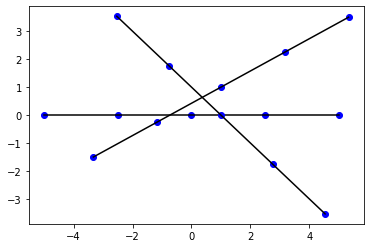

In [75]:
s.plot(plt.gca())
s.update_loc(1,0,45)
s.plot(plt.gca())
s.update_loc(1,1,120)
s.plot(plt.gca())